<a href="https://colab.research.google.com/github/DitsaP/WaterPumpPrediction/blob/main/WaterPumpPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predictive Maintenance of Water Pump Sensor


### Problem Statement

##### The water pump sensor dataset for a company handling water pump for supply in a town everyday. This dataset consists of 220320 rows and 54 columns consisting of unique id, timestamp, details about the sensors.

### Data Definitions :

##### Unnamed 0: Consists of Id foe each time of sensors working.
##### timestamp : Date and time(year, month, day, hour, minute) for each sensors
##### sensor_00 to sensor_51 : This is total of 52 sensors and performance value  of each sensors for every hour.
##### Machine_status : the working status of the machine

1. Importing Libraries

In [ ]:
#importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

# preprocessing and modeling libraries
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score , classification_report
from sklearn.metrics import recall_score,roc_curve ,precision_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import GridSearchCV

2. Loading Dataset

In [ ]:
df = pd.read_csv("sensor.csv", index_col= 'timestamp')
df.head()

,Unnamed: 0,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00,0,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2018-04-01 00:01:00,1,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2018-04-01 00:02:00,2,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
2018-04-01 00:03:00,3,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
2018-04-01 00:04:00,4,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


3. Data Preparation

###### The process of data preparation entails cleansing, structuring and integrating data to make it ready for analysis.

###### Here we will analyze and prepare data to perform regression techniques:<br>
                        1. Check dimensions and data types of the dataframe <br>
                        2. Study summary statistics<br>
                        3. Converting date into standard format<br>
                        4. Check for missing values<br>
                        5. Study correlation
                        6. Removal/cleaning of dataset

3.1 Checking Dimension and data types of the dataframe

In [ ]:
df.shape

(220320, 54)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220320 entries, 2018-04-01 00:00:00 to 2018-08-31 23:59:00
Data columns (total 54 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      220320 non-null  int64  
 1   sensor_00       210112 non-null  float64
 2   sensor_01       219951 non-null  float64
 3   sensor_02       220301 non-null  float64
 4   sensor_03       220301 non-null  float64
 5   sensor_04       220301 non-null  float64
 6   sensor_05       220301 non-null  float64
 7   sensor_06       215522 non-null  float64
 8   sensor_07       214869 non-null  float64
 9   sensor_08       215213 non-null  float64
 10  sensor_09       215725 non-null  float64
 11  sensor_10       220301 non-null  float64
 12  sensor_11       220301 non-null  float64
 13  sensor_12       220301 non-null  float64
 14  sensor_13       220301 non-null  float64
 15  sensor_14       220299 non-null  float64
 16  sensor_15       0 non-null    

3.2 Study summary statistics

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,220320.0,110159.500000,63601.049991,0.000000,55079.750000,110159.500000,165239.250000,220319.000000
sensor_00,210112.0,2.372221,0.412227,0.000000,2.438831,2.456539,2.499826,2.549016
sensor_01,219951.0,47.591611,3.296666,0.000000,46.310760,48.133678,49.479160,56.727430
sensor_02,220301.0,50.867392,3.666820,33.159720,50.390620,51.649300,52.777770,56.032990
sensor_03,220301.0,43.752481,2.418887,31.640620,42.838539,44.227428,45.312500,48.220490
sensor_04,220301.0,590.673936,144.023912,2.798032,626.620400,632.638916,637.615723,800.000000
sensor_05,220301.0,73.396414,17.298247,0.000000,69.976260,75.576790,80.912150,99.999880
sensor_06,215522.0,13.501537,2.163736,0.014468,13.346350,13.642940,14.539930,22.251160
sensor_07,214869.0,15.843152,2.201155,0.000000,15.907120,16.167530,16.427950,23.596640
sensor_08,215213.0,15.200721,2.037390,0.028935,15.183740,15.494790,15.697340,24.348960


 3.3 Converting date into standard format

In [ ]:
df['machine_status'].unique()

array(['NORMAL', 'BROKEN', 'RECOVERING'], dtype=object)

In [ ]:
#convert machine_status column to category
df['machine_status']=df['machine_status'].astype('category')

In [ ]:
df.index.is_unique

True

3.4 Checking for Missing Value

In [ ]:
#?Handling Missing values
round((df.isnull().sum() * 100/ len(df)),2).sort_values(ascending=False)

sensor_15         100.00
sensor_50          34.96
sensor_51           6.98
sensor_00           4.63
sensor_07           2.47
sensor_08           2.32
sensor_06           2.18
sensor_09           2.09
sensor_01           0.17
sensor_30           0.12
sensor_32           0.03
sensor_29           0.03
sensor_22           0.02
sensor_18           0.02
sensor_17           0.02
sensor_25           0.02
sensor_14           0.01
sensor_16           0.01
sensor_35           0.01
sensor_36           0.01
sensor_37           0.01
sensor_38           0.01
sensor_39           0.01
sensor_40           0.01
sensor_41           0.01
sensor_42           0.01
sensor_43           0.01
sensor_44           0.01
sensor_45           0.01
sensor_46           0.01
sensor_47           0.01
sensor_48           0.01
sensor_49           0.01
sensor_34           0.01
sensor_33           0.01
sensor_02           0.01
sensor_23           0.01
sensor_13           0.01
sensor_12           0.01
sensor_19           0.01


In [ ]:
df.fillna(method = 'ffill' , inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220320 entries, 2018-04-01 00:00:00 to 2018-08-31 23:59:00
Data columns (total 54 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   Unnamed: 0      220320 non-null  int64   
 1   sensor_00       220320 non-null  float64 
 2   sensor_01       220320 non-null  float64 
 3   sensor_02       220320 non-null  float64 
 4   sensor_03       220320 non-null  float64 
 5   sensor_04       220320 non-null  float64 
 6   sensor_05       220320 non-null  float64 
 7   sensor_06       220320 non-null  float64 
 8   sensor_07       220320 non-null  float64 
 9   sensor_08       220320 non-null  float64 
 10  sensor_09       220320 non-null  float64 
 11  sensor_10       220320 non-null  float64 
 12  sensor_11       220320 non-null  float64 
 13  sensor_12       220320 non-null  float64 
 14  sensor_13       220320 non-null  float64 
 15  sensor_14       220320 non-null  float64 
 16  sensor_15   

3.5 Checking Correlation

<Axes: >

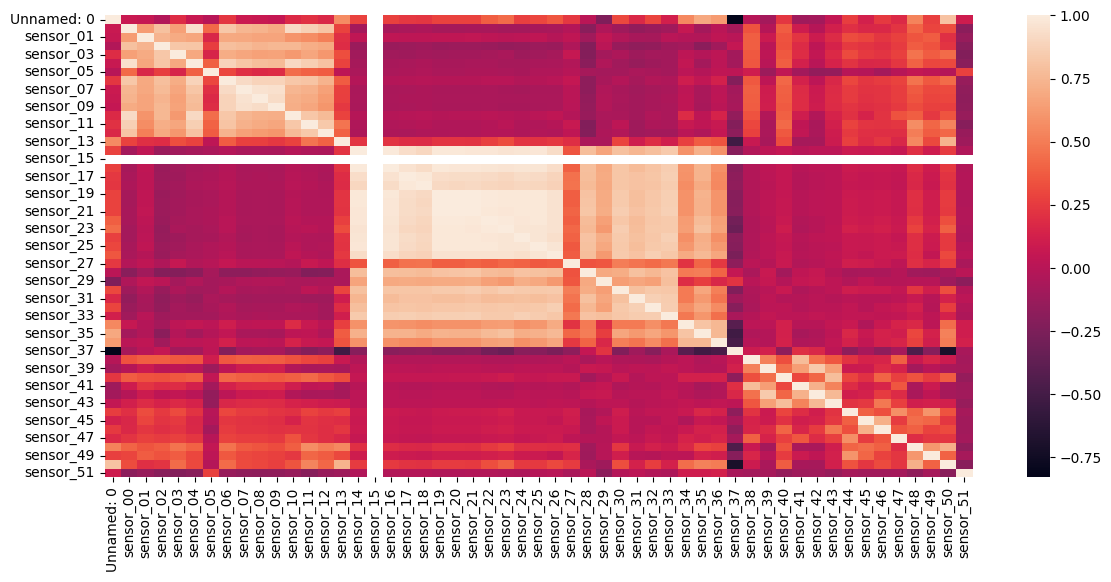

In [ ]:
plt.figure(figsize=(14,6))
corr=df.corr()
sns.heatmap(corr,cbar=True)

3.6 Cleaning/Removal of unrelated attributes

In [ ]:
df.drop(['Unnamed: 0','sensor_15'], axis =1 , inplace =True)


4. EDA (Vizualization)

NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: machine_status, dtype: int64


<Axes: xlabel='machine_status', ylabel='count'>

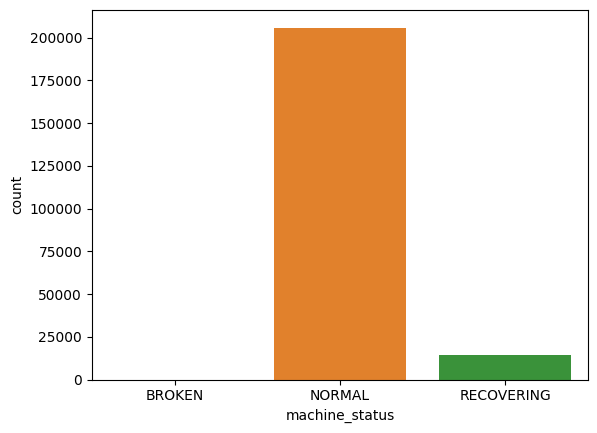

In [ ]:
print(df.machine_status.value_counts())
sns.countplot(x= 'machine_status', data =df)

<Axes: >

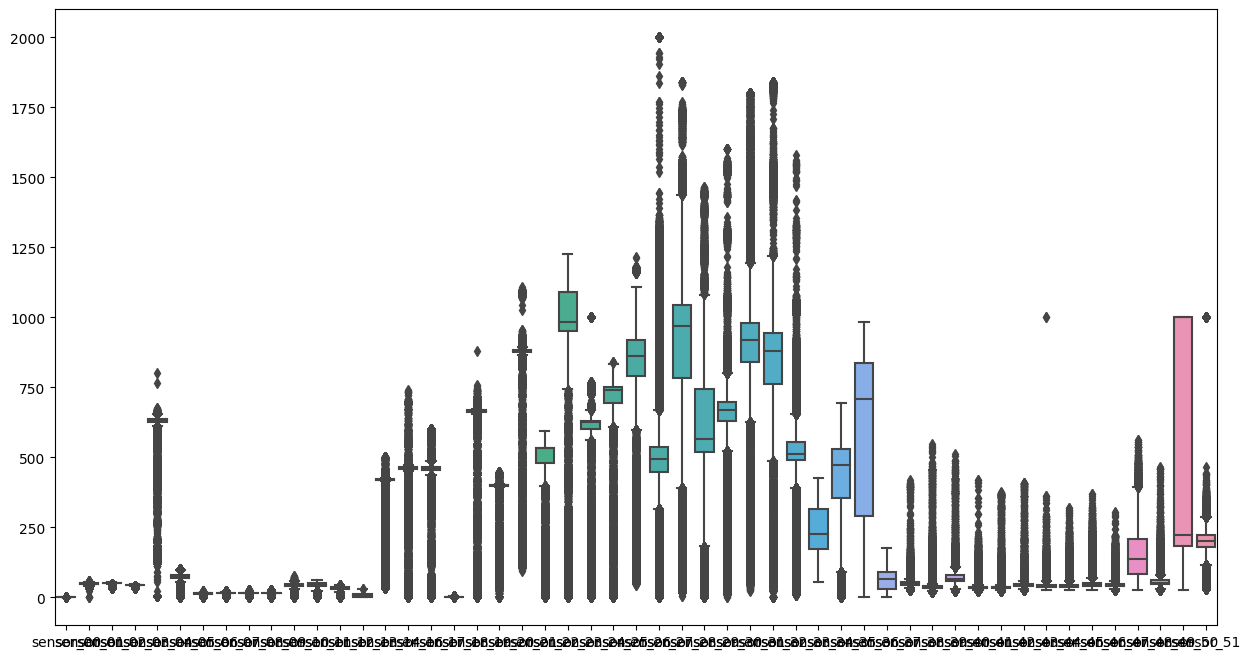

In [ ]:
#check outliers
plt.figure(figsize=(15,8))
sns.boxplot(df)

5. Time series Analysis

###### Time-Series Analysis of data for better understanding how sensors respond and what measures could be taken immediately and in future.

In [ ]:
dfBroken = df[df['machine_status'] =='BROKEN']
dfRecovery = df[df['machine_status'] == 'RECOVERING']
dfSensors = df.drop(['machine_status'], axis=1)
sensorNames=dfSensors.columns


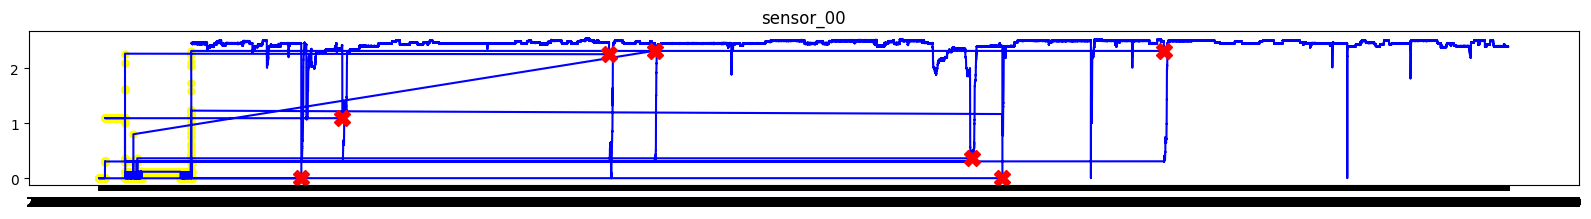

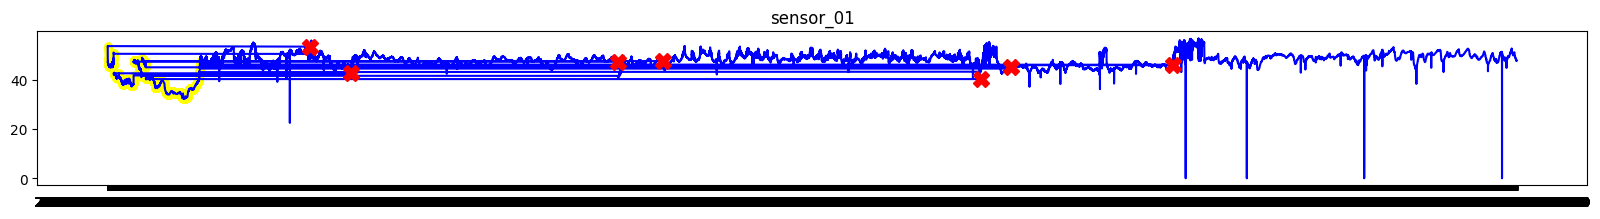

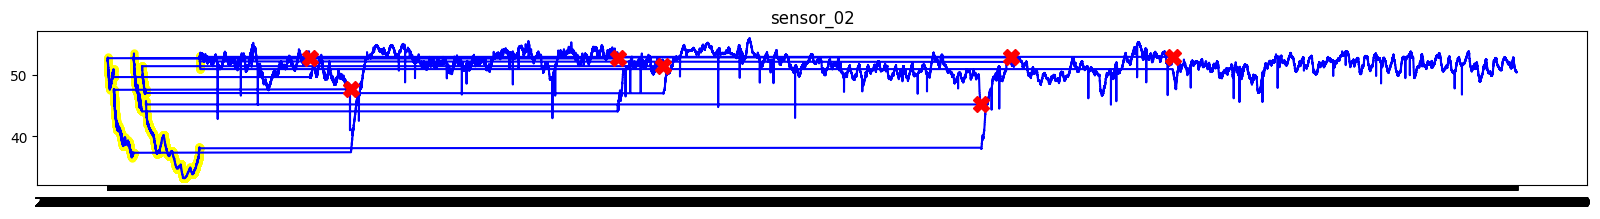

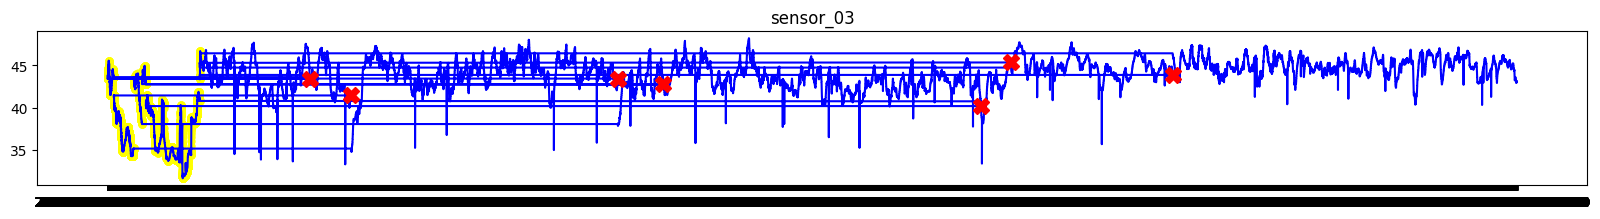

KeyboardInterrupt: ignored

In [ ]:
for sensor in sensorNames:
    plot = plt.figure(figsize=(20,2))
    plot = plt.plot(dfRecovery[sensor], linestyle='none', marker='o', color='yellow', markersize=5)
    plot = plt.plot(df[sensor], color='blue')
    plot = plt.plot(dfBroken[sensor], linestyle='none', marker='X', color='red', markersize=12)
    plot = plt.title(sensor)
    plt.show()

In [ ]:
def ts_to_supervised(data, n_in=1, n_out=1, dropnan = True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(),list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names +=[('feat_%d(t-%d)' %(j, i)) for j in range (n_vars)]
    #forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names +=[('feat_%d(t)' %(j)) for j in range (n_vars)]
        else:
            names +=[('feat_%d(t+%d)' %(j, i)) for j in range (n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns=names
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [ ]:
feat = df.columns.drop('machine_status').tolist()
features = feat + ['machine_status'] # Reordering features list so that the target is at the end.

X = df[features]
Lag=10 # How many steps to look into the future
df_shift=ts_to_supervised(X, n_in=Lag, n_out=1)
remove_feat_1 =['feat_'+str(n-1)+'(t)' for n in range(1,len(X.columns)+1)]
remove_feat_2 =['feat_'+str(n-1)+'(t-'+ str(i)+')' for n in range(1,len(X.columns)+1) for i in range(1,Lag)]

df_y=df_shift.iloc[:,-1] #Get the target data out before removing unwanted data
df_y=df_y.replace(['NORMAL', 'BROKEN', 'RECOVERING'],[1, 0, 0]) #Get the target data out before removing unwanted data
df_x=df_shift.drop(remove_feat_1+remove_feat_2, axis=1) #remove sensors(t)
df_x.drop(df_x.columns[len(df_x.columns)-1], axis=1, inplace=True)
df_x.columns

6. Data Split, Scaling and Feature Selection

In [ ]:
#Train Test Split
X= df_x
y= df_y
from sklearn.model_selection import train_test_split
X_train ,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25 , random_state= 21)
X_train.shape

In [ ]:

#Normalization of data
normalized = Normalizer()
X_train = normalized.fit_transform(X_train)
X_train = pd.DataFrame(X_train)
X_test = normalized.fit_transform(X_test)
X_test = pd.DataFrame(X_test)


In [ ]:
#feature selection
pca= PCA(n_components = 0.97 , svd_solver= 'full')
pca.fit(X_train)
print('No.. of best selected components : ', {pca.n_components_})

In [ ]:
#feature importance
model = RandomForestClassifier(max_depth=40, random_state=0, n_estimators=200)
model.fit(X_train, y_train)
importances = model.feature_importances_
indices = np.argsort(importances)

features = X_train.columns


In [ ]:
top=10
fig = plt.figure(figsize=(6,6),facecolor="w")
plt.title('Feature Importance')
plt.barh(range(len(indices))[-top:], importances[indices][-top:], color='r', align='center')
plt.yticks(range(len(indices))[-top:], [features[i] for i in indices[-top:]])
plt.xlabel('Relative Importance')
plt.show()

top_features = [features[i] for i in indices][-top:]


In [ ]:
df_x.plot(subplots =True, sharex = True, figsize = (20,50), legend = False)
plt.show()

7. Model Training and Evaluation

In [ ]:
#model training
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

In [ ]:
rf= RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

In [ ]:
ab =AdaBoostClassifier()
ab.fit(X_train, y_train)

y_pred_ab = ab.predict(X_test)
print(confusion_matrix(y_test, y_pred_ab))
print(classification_report(y_test, y_pred_ab))

In [ ]:
xgb =XGBClassifier()
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

In [ ]:
cols = ['Model', 'Precision Score', 'Recall Score','Accuracy Score','f1-score']
result_tabulation = pd.DataFrame(columns = cols)

In [ ]:
Decision_Tree = pd.Series({'Model': "Decision Tree",'Precision Score':metrics.precision_score(y_test,y_pred_dt,average='weighted'),'Recall Score':metrics.recall_score(y_test,y_pred_dt,average='weighted'),
                  'Accuracy Score':metrics.accuracy_score(y_test,y_pred_dt),'f1-score':metrics.f1_score(y_test,y_pred_dt,average='weighted')})

result_tabulation =result_tabulation.append(Decision_Tree,ignore_index=True)

KNN = pd.Series({'Model': "KNN",'Precision Score':metrics.precision_score(y_test,y_pred_knn,average='weighted'),'Recall Score':metrics.recall_score(y_test,y_pred_knn,average='weighted'),
                  'Accuracy Score':metrics.accuracy_score(y_test,y_pred_knn),'f1-score':metrics.f1_score(y_test,y_pred_knn,average='weighted')})

result_tabulation =result_tabulation.append(KNN,ignore_index=True)



In [ ]:
Random_Forest= pd.Series({'Model': "Random_Forest",'Precision Score':metrics.precision_score(y_test,y_pred_rf,average='weighted'),'Recall Score':metrics.recall_score(y_test,y_pred_rf,average='weighted'),
                  'Accuracy Score':metrics.accuracy_score(y_test,y_pred_rf),'f1-score':metrics.f1_score(y_test,y_pred_rf,average='weighted')})
result_tabulation =result_tabulation.append(Random_Forest,ignore_index=True)

Ada_boost= pd.Series({'Model': "Ada_boost",'Precision Score':metrics.precision_score(y_test,y_pred_ab,average='weighted'),'Recall Score':metrics.recall_score(y_test,y_pred_ab, average='weighted'),
                  'Accuracy Score':metrics.accuracy_score(y_test,y_pred_ab),'f1-score':metrics.f1_score(y_test,y_pred_ab,average='weighted')})

result_tabulation =result_tabulation.append(Ada_boost,ignore_index=True)

XG_boost= pd.Series({'Model': "XG_Boost",'Precision Score':metrics.precision_score(y_test,y_pred_xgb,average='weighted'),'Recall Score':metrics.recall_score(y_test,y_pred_xgb,average='weighted'),
                  'Accuracy Score':metrics.accuracy_score(y_test,y_pred_xgb),'f1-score':metrics.f1_score(y_test,y_pred_xgb,average='weighted')})
result_tabulation =result_tabulation.append(XG_boost,ignore_index=True)
result_tabulation


8. Hyperparameter Tuning of Algorithms

In [ ]:
#Hyperparameter Tuning

#decision tree
tree_params = {"criterion": ["gini", "entropy"], "max_depth": range(1, 15),
              "min_samples_leaf": range(1,30)}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params, scoring= 'accuracy')
grid_tree.fit(X_train, y_train)
grid_tree.best_params_
grid_tree.best_score_

In [ ]:
#knn gridsearch
knn_params = {"n_neighbors": range(1,5), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

gs_knn = GridSearchCV(KNeighborsClassifier(), knn_params)
gs_knn.fit(X_train, y_train)

gs_knn.best_params_
gs_knn.best_score_

In [ ]:
#random forest gridsearch
rfp=[{'max_depth':range(1,15),'n_estimators': range(1,20),'max_features':range(1,5)}]
clf=GridSearchCV(rfgs,pt,cv=10,scoring='accuracy')
clf.fit(X_train,y_train)

clf.best_params_
clf.best_score_

In [ ]:
#xg boost gridsearch
xgb_param = [{'learning_rate': [0.1, 0.2, 0.3],'max_depth': [3, 5, 7],'n_estimators': [100, 200, 300],'subsample': [0.5,0.8, 1.0]}]
grid_search = GridSearchCV(estimator=xgb, param_grid=xgb_param, scoring='accuracy')
grid_search.fit(X_train, y_train)

grid_search.best_params_
grid_search.best_score_

In [ ]:
dt_fpr, dt_tpr, dt_thresold = roc_curve(y_train, y_pred_dt)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, y_pred_knn)
rf_fpr, rf_tpr, rf_threshold = roc_curve(y_train, y_pred_rf)
ab_fpr, ab_tpr, ab_threshold = roc_curve(y_train, y_pred_ab)
xgb_fpr, xgb_tpr, xgb_threshold = roc_curve(y_train, y_pred_xgb)
